# Hotelling's statistics
ホテリング統計量で異常検知  
別名ホテリングの$T^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Data:
    def __init__(self, name):
        # 加速度、角速度データの読み込み
        data = np.loadtxt("data1/" + name + ".txt")
        self.accel_x = data[0:,0:1]
        self.accel_y = data[0:,1:2]
        self.accel_z = data[0:,2:3]
        
        self.omega_x = data[0:,3:4]
        self.omega_y = data[0:,4:5]
        self.omega_z = data[0:,5:6]
        
        self.t = np.arange(0, len(self.accel_x), 1)
        
# 加速度描画関数

def plot_accel(data, x_min, x_max):
    fig = plt.figure(figsize=(20,3))
    sp = fig.add_subplot(111)
    sp.set_xlim(x_min, x_max)
    sp.set_ylim(-45, 25)
    plt.title("acceleration")
    plt.plot(data.t, data.accel_x, color = "orange",label="x")
    plt.plot(data.t, data.accel_y, color = "skyblue",label="y")
    plt.plot(data.t, data.accel_z, color = "pink",label="z")
    plt.legend()
    plt.show()
    
def plot_other(data, x_min, x_max, y_min, y_max, labels):
    fig = plt.figure(figsize=(20,3))
    sp = fig.add_subplot(111)
    sp.set_xlim(x_min, x_max)
    sp.set_ylim(y_min, y_max)
    for i in range(len(data)):
        plt.plot(np.arange(0, len(data[i]), 1), data[i], label=labels[i])
    plt.legend()
    plt.show()

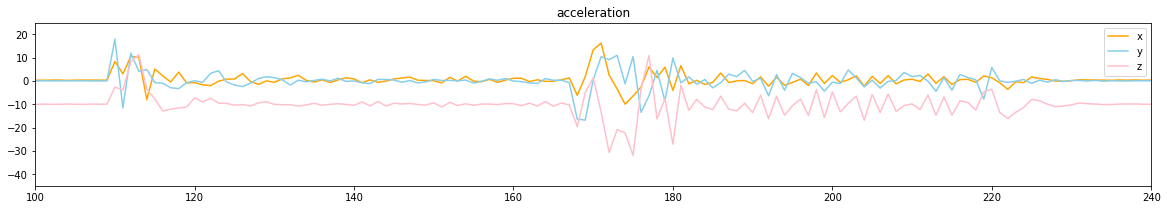

In [3]:
# データの読み込み
crash = Data("crash")

# 描画
plot_accel(crash, 100, 240)

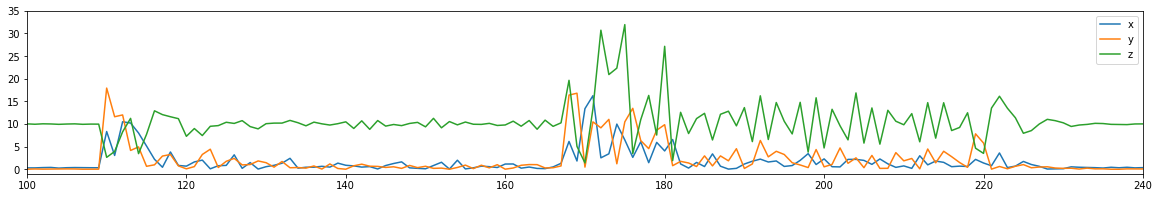

In [4]:
# 加速度の絶対値をとる
abu = []
abu.append(np.sqrt(crash.accel_x ** 2))
abu.append(np.sqrt(crash.accel_y ** 2))
abu.append(np.sqrt(crash.accel_z ** 2))

plot_other(abu, 100, 240, -1, 35, ["x", "y", "z"])

In [5]:
# 異常度保存用配列
ano_ho = []

# 各軸の加速度の平均、標準偏差を求め、ホテリング統計量を計算

mean_x = 0
sigma_x = 0

for i in range(140, 160):
    mean_x += abu[0][i] / 20
    
for i in range(120, 160):
    sigma_x += (mean_x - abu[0][i]) ** 2 / 20
sigma_x = np.sqrt(sigma_x)

ano_ho.append((abu[0] - mean_x) ** 2 / sigma_x ** 2)


mean_y = 0
sigma_y = 0

for i in range(140, 160):
    mean_y += abu[1][i] / 20
    
for i in range(120, 160):
    sigma_y += (mean_y - abu[1][i]) ** 2 / 20
sigma_y = np.sqrt(sigma_y)

ano_ho.append((abu[1] - mean_y) ** 2 / sigma_y ** 2)


mean_z = 0
sigma_z = 0

for i in range(140, 160):
    mean_z += abu[2][i] / 20
    
for i in range(120, 160):
    sigma_z += (mean_z - abu[2][i]) ** 2 / 20
sigma_z = np.sqrt(sigma_z)

ano_ho.append((abu[2] - mean_z) ** 2 / sigma_z ** 2)

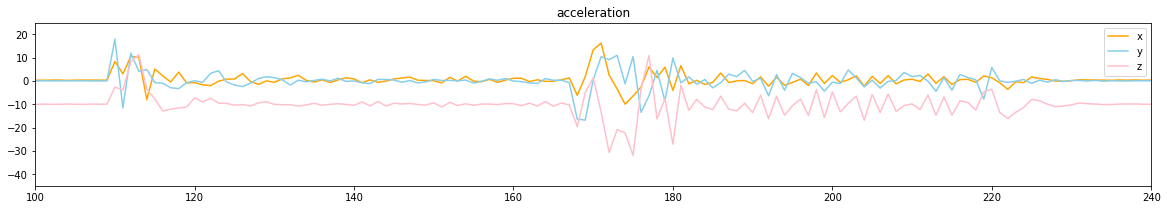

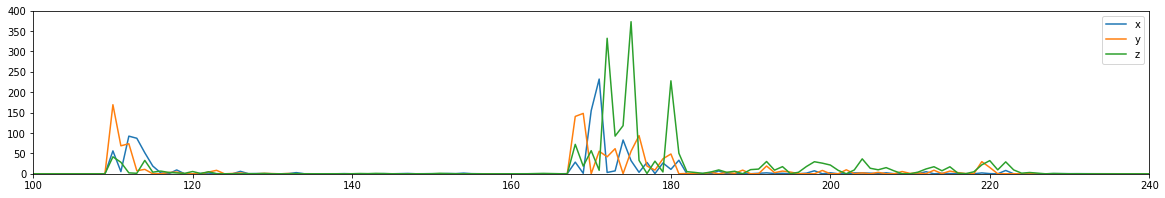

In [6]:
# 加速度の描画
plot_accel(crash, 100, 240)
# 異常度の描画
plot_other(ano_ho, 100, 240, 0, 400, ["x", "y", "z"])